## KP Model Slider graphs

This Notebook creates a slider to scroll through 100 antigenicity values and plot 2000 time points for each.

Ensure this file has access to the '0003_c_sweep_ga_0' folder as it pulls data from those prerun simulations. This is due to each run of 2000 steps take about 50-60s to run.

In [2]:
# slider notebook
%reset -f

# autoreload imports
%load_ext autoreload
%autoreload 2

# import necessary libraries
import numpy as np
import pandas as pd
import csv
import glob
import os
import re

import matplotlib.pyplot as plt
from matplotlib.widgets import Button, Slider

# import plotly for interactive plots
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype"

from Visualization.pop_plotting import plot_pop, pop_fit_plot, plot_quad
from Visualization.data_handling import load_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
def plot_quad(t, tau, fitness_history, x, y, z, population1, population2, population3, s_1, s_2, title="Populations and Fitness", yrange=None):
    """
    Plots the fitness over generations.

    Parameters:
    population1 (list): A list of population values for the first population over each generation.
    population2 (list): A list of population values for the second population over each generation.
    population3 (list): A list of population values for the third population over each generation.
    fitness_history (list): A list of fitness values over each generation.
    """
    import os
    import matplotlib.pyplot as plt

    time = t
    plt.figure(figsize=(12, 10))
    
    plt.subplot(2, 2, 1)
    
    plt.plot(t, x, color='blue', label='x(t)')
    plt.plot(t, y, color='red', label='y(t)')
    plt.plot(t, z, color='green', label='z(t)')
    plt.title("Populations over Time")
    plt.xlabel('Time')
    plt.ylabel('Population')
    
    yrange_pop = None
    if yrange_pop is not None:
        plt.ylim(yrange_pop)
   
    plt.grid(True)
    plt.legend(loc='upper right')
    
    
    plt.subplot(2, 2, 2)
    generations_pop = list(range(len(population1)))
    plt.plot(time, population1, color='blue', label='Effector Cells')
    plt.plot(time, population2, color='red', label='Tumor Cells')
    plt.plot(time, population3, color='green', label='IL-2 Levels')
    plt.title("Populations over Time")
    plt.xlabel('Time')
    plt.ylabel('Population')
    
    yrange_pop = None
    if yrange_pop is not None:
        plt.ylim(yrange_pop)
    plt.grid(True)
    plt.legend(loc='upper right')


    plt.subplot(2, 2, 3)
    generations_treatment = list(range(len(s_1)))
    plt.plot(time, s_1, color='orange', label=' Ext. Immune cells  s_1')
    plt.plot(time, s_2, color='cyan', label='Ext. IL-2 dosing s_2')
    plt.title("Treatment over Time")
    plt.xlabel('Time')
    plt.ylabel('Dose')
    
    yrange_fit = None
    if yrange_fit is not None:
        plt.ylim(yrange_fit)
    plt.grid(True)
    plt.legend(loc='upper right')


    plt.subplot(2, 2, 4)
    generations_fit = list(range(len(fitness_history)))
    plt.plot(generations_fit, fitness_history, color='purple', label='Fitness')
    plt.title("Fitness over Generations")
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    
    yrange_fit = None
    if yrange_fit is not None:
        plt.ylim(yrange_fit)
    plt.grid(True)
    plt.legend(loc='upper right')

In [ ]:
"""
Outputs like: ['Time_Step', 'tau', 'x', 'y', 'z', 'E', 'T', 'IL', 's_1_array', 's_2_array', 'Fitness']
"""

t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness = load_data('Output_data/simu_data_test_ga1.csv')


def func(t, antigenicity):
    c = antigenicity
    
    

In [3]:
# initial slider value
init_antigenicity = 0.0297

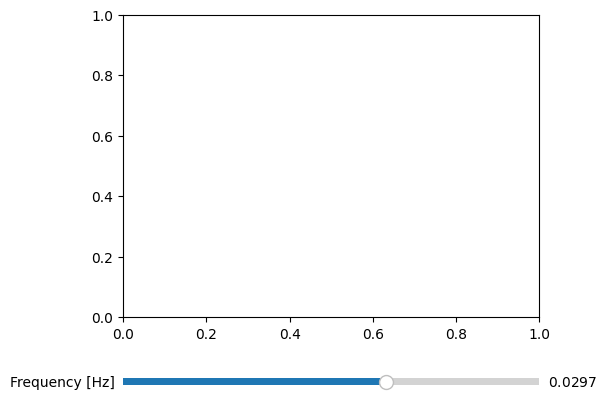

In [ ]:
# create the figure and the slider
fig, ax = plt.subplots()

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# create the antigenicity slider
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
anti_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=-0.005,
    valmax=0.05,
    valinit=init_antigenicity,
)

# update function to be called when the slider's value changes
def update(val):
    
    
    fig.canvas.draw_idle()